First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None

Missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
specie

/tmp/ipykernel_3937/37969016.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('species').mean())
/tmp/ipykernel_3937/37969016.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('species').std())


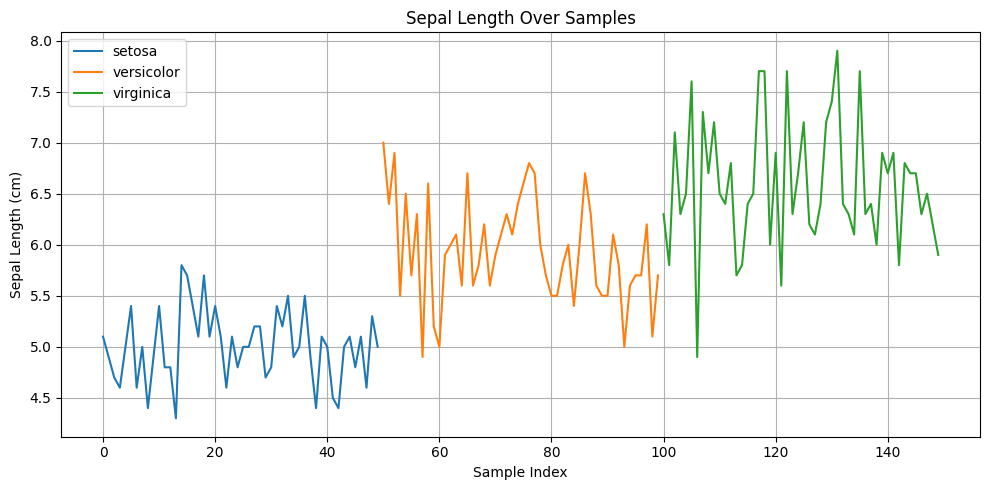

/tmp/ipykernel_3937/37969016.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_petal_length = df.groupby('species')['petal_length'].mean()


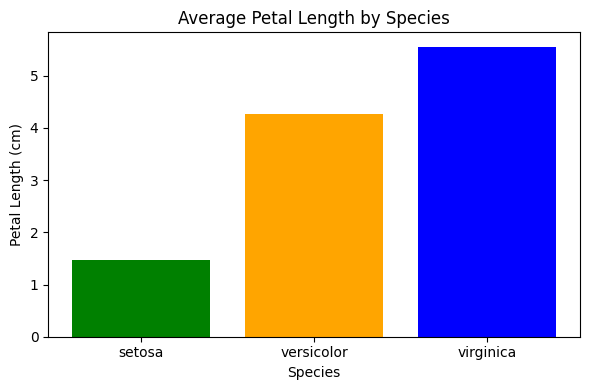

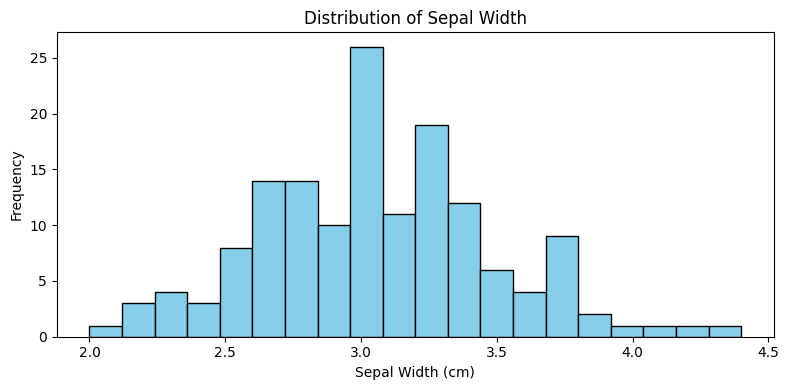

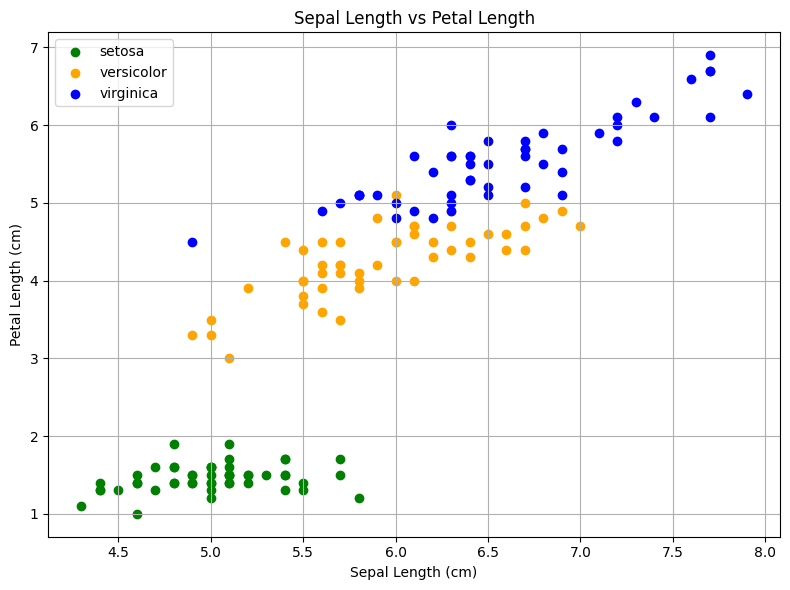

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Task 1: Load and Explore the Dataset
try:
    # Load the Iris dataset
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

    # Rename columns for ease of use
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

    # Display first few rows
    print("First 5 rows of the dataset:")
    print(df.head())

    # Dataset info
    print("\nDataset Information:")
    print(df.info())

    # Check for missing values
    print("\nMissing values:")
    print(df.isnull().sum())

    # Drop any missing values (if any)
    df.dropna(inplace=True)

except Exception as e:
    print(f"An error occurred: {e}")

# Task 2: Basic Data Analysis
print("\nDescriptive Statistics:")
print(df.describe())

print("\nMean values by species:")
print(df.groupby('species').mean())

print("\nStandard deviation by species:")
print(df.groupby('species').std())

# Task 3: Data Visualization

# 1. Line chart – Sepal Length Over Sample Index
plt.figure(figsize=(10, 5))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.plot(subset.index, subset['sepal_length'], label=species)
plt.title("Sepal Length Over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Sepal Length (cm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Bar chart – Average Petal Length by Species
avg_petal_length = df.groupby('species')['petal_length'].mean()
plt.figure(figsize=(6, 4))
plt.bar(avg_petal_length.index, avg_petal_length.values, color=['green', 'orange', 'blue'])
plt.title("Average Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.tight_layout()
plt.show()

# 3. Histogram – Distribution of Sepal Width
plt.figure(figsize=(8, 4))
plt.hist(df['sepal_width'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 4. Scatter plot – Sepal Length vs Petal Length
plt.figure(figsize=(8, 6))
colors = {'setosa': 'green', 'versicolor': 'orange', 'virginica': 'blue'}
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal_length'], subset['petal_length'],
                label=species, color=colors[species])
plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()